In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from LinearRegression import LinearRegression

In [2]:
data_path = Path.cwd()
df = pd.read_csv(data_path / 'test_energy_data.csv')
df.head(10)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
5,Industrial,31207,47,28,22.82,Weekday,5026.23
6,Residential,39227,18,44,23.36,Weekend,4404.56
7,Residential,7814,21,19,27.27,Weekday,2394.37
8,Industrial,20482,24,16,23.00,Weekend,3969.09
9,Industrial,21030,90,35,12.96,Weekday,5136.69


## Visualize data

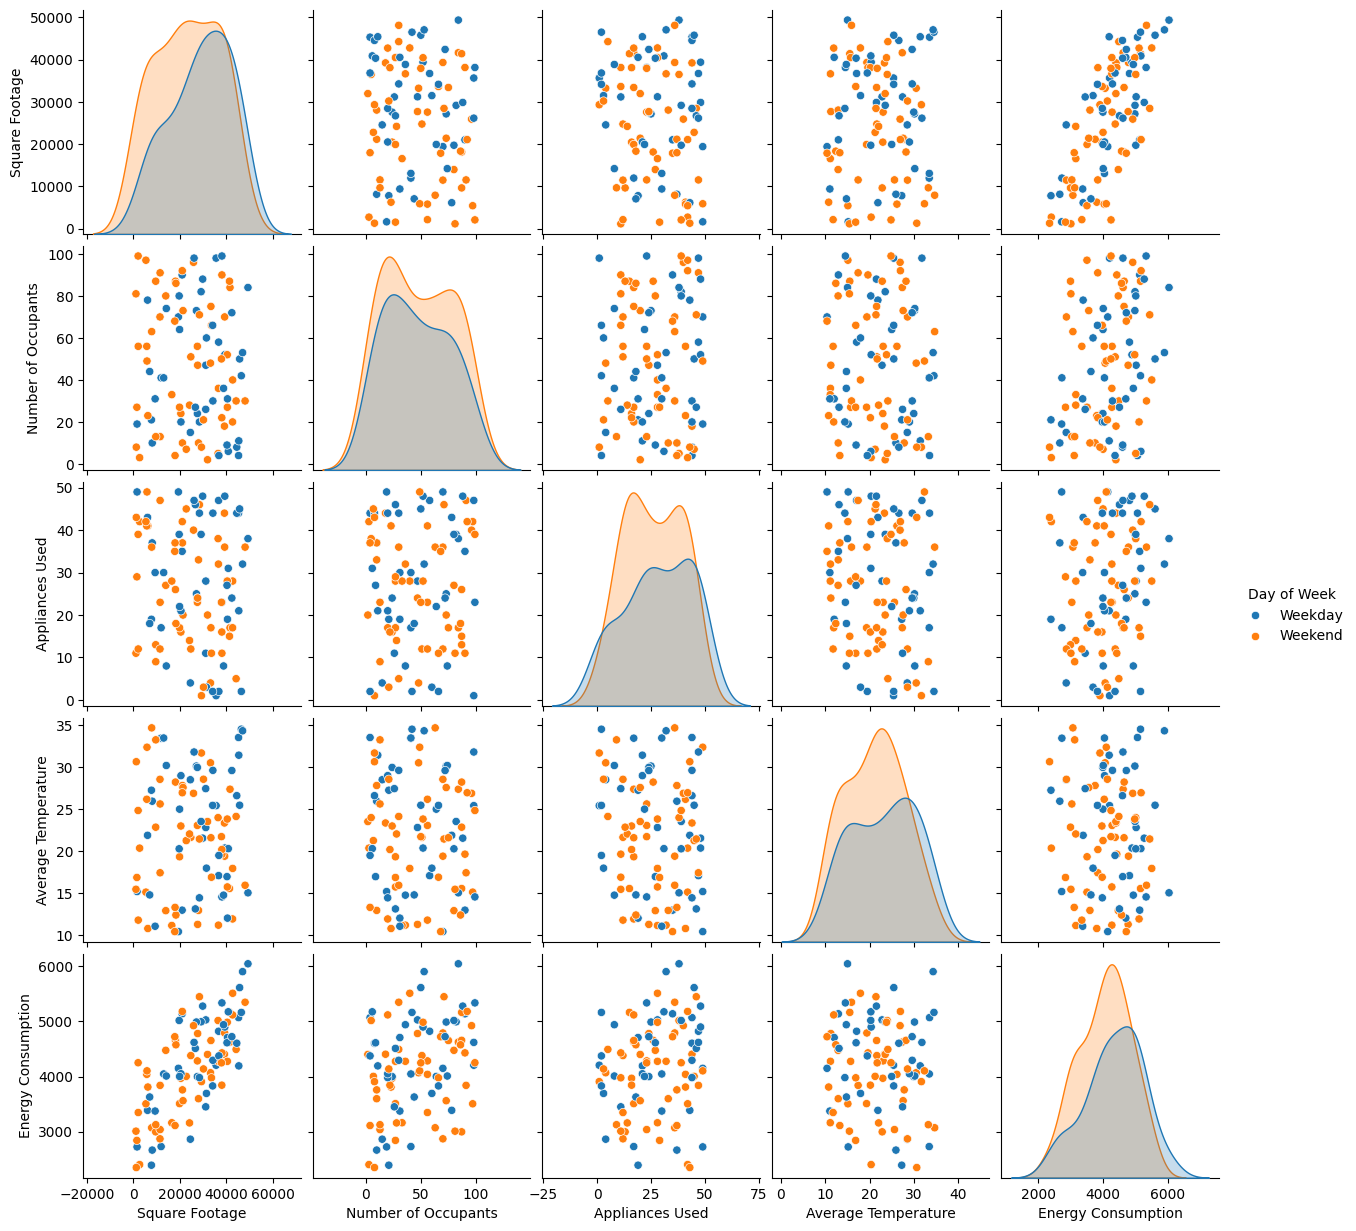

In [3]:
sns.pairplot(df, hue='Day of Week')

<Axes: >

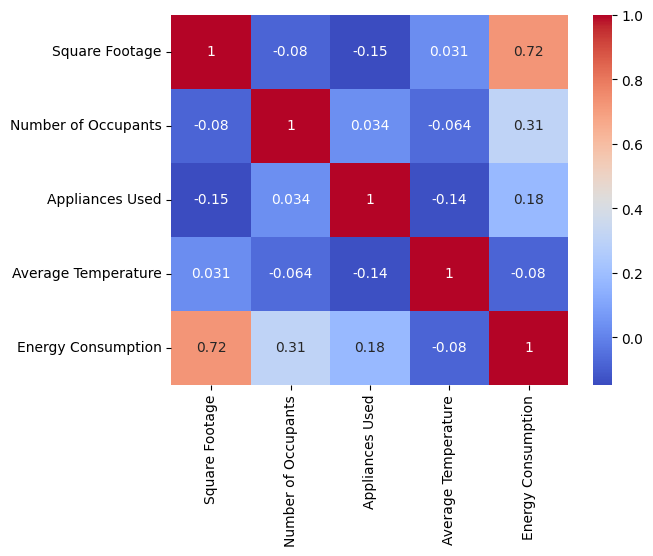

In [4]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

# Prepare data

In [5]:
# binarize Day of Week to -1 for weekend and 1 for weekday
df.loc[df['Day of Week']=='Weekend', 'Day of Week']=-1
df.loc[df['Day of Week']=='Weekday', 'Day of Week']=1

# # binarize smoker to -1 for yes and 1 for no
# df.loc[df['smoker']=='yes', 'smoker']=-1
# df.loc[df['smoker']=='no', 'smoker']=1

# Remove Building Type
if 'Building Type' in df.columns:
    df = df.drop(['Building Type'], axis=1)
df.head(10)

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,24563,15,4,28.52,1,2865.57
1,27583,56,23,23.07,-1,4283.80
2,45313,4,44,33.56,1,5067.83
3,41625,84,17,27.39,-1,4624.30
4,36720,58,47,17.08,1,4820.59
5,31207,47,28,22.82,1,5026.23
6,39227,18,44,23.36,-1,4404.56
7,7814,21,19,27.27,1,2394.37
8,20482,24,16,23.00,-1,3969.09
9,21030,90,35,12.96,1,5136.69


# Linear Regression

In [6]:
# Choose features to predict
features = df.columns[:2]
X, y = df[features].to_numpy(), df[['Energy Consumption']].to_numpy()

In [22]:
model = LinearRegression(X=X, y_gt=y, lr=1e-9, eps=1e-6)
model.fit()
model.score()


--- Itération 0 ---
MSE = 2.1243613E+08

--- Itération 1000 ---
MSE = 1.1510179E+06

--- Itération 2000 ---
MSE = 1.1492069E+06

--- Itération 3000 ---
MSE = 1.1474013E+06

--- Itération 4000 ---
MSE = 1.1456009E+06

--- Itération 5000 ---
MSE = 1.1438058E+06

--- Itération 6000 ---
MSE = 1.1420159E+06

--- Itération 7000 ---
MSE = 1.1402312E+06

--- Itération 8000 ---
MSE = 1.1384518E+06

--- Itération 9000 ---
MSE = 1.1366775E+06

--- Itération 10000 ---
MSE = 1.1349085E+06

--- Itération 11000 ---
MSE = 1.1331446E+06

--- Itération 12000 ---
MSE = 1.1313858E+06

--- Itération 13000 ---
MSE = 1.1296322E+06

--- Itération 14000 ---
MSE = 1.1278837E+06

--- Itération 15000 ---
MSE = 1.1261403E+06

--- Itération 16000 ---
MSE = 1.1244020E+06

--- Itération 17000 ---
MSE = 1.1226688E+06

--- Itération 18000 ---
MSE = 1.1209407E+06

--- Itération 19000 ---
MSE = 1.1192175E+06

--- Itération 20000 ---
MSE = 1.1174995E+06

--- Itération 21000 ---
MSE = 1.1157864E+06

--- Itération 22000 --

np.float64(-1.3513645007211026)

In [37]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=10000, learning_rate='constant', eta0=1e-9, random_state=42)
sgd.fit(X, y)
sgd.score(X, y)
sgd.coef_

C:\Appli\industrie4.0\conda\envs\ms\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.14310977, 0.04441487])

In [31]:
# model.plot_featureimportance(names=features)

In [10]:
def plot_mse(y_pred, y_gt, threshold=0):
    error = np.abs(y_pred-y_gt)

    plt.figure(figsize=(30,10))
    plt.stem(error, linefmt='navy')
    plt.hlines(threshold, 0, y_pred.shape[0], lw=2, ls=':', color='darkorange')
    plt.ylabel('|y_pred-y_gt|')
    plt.show()

In [11]:
y_pred = model.predict()

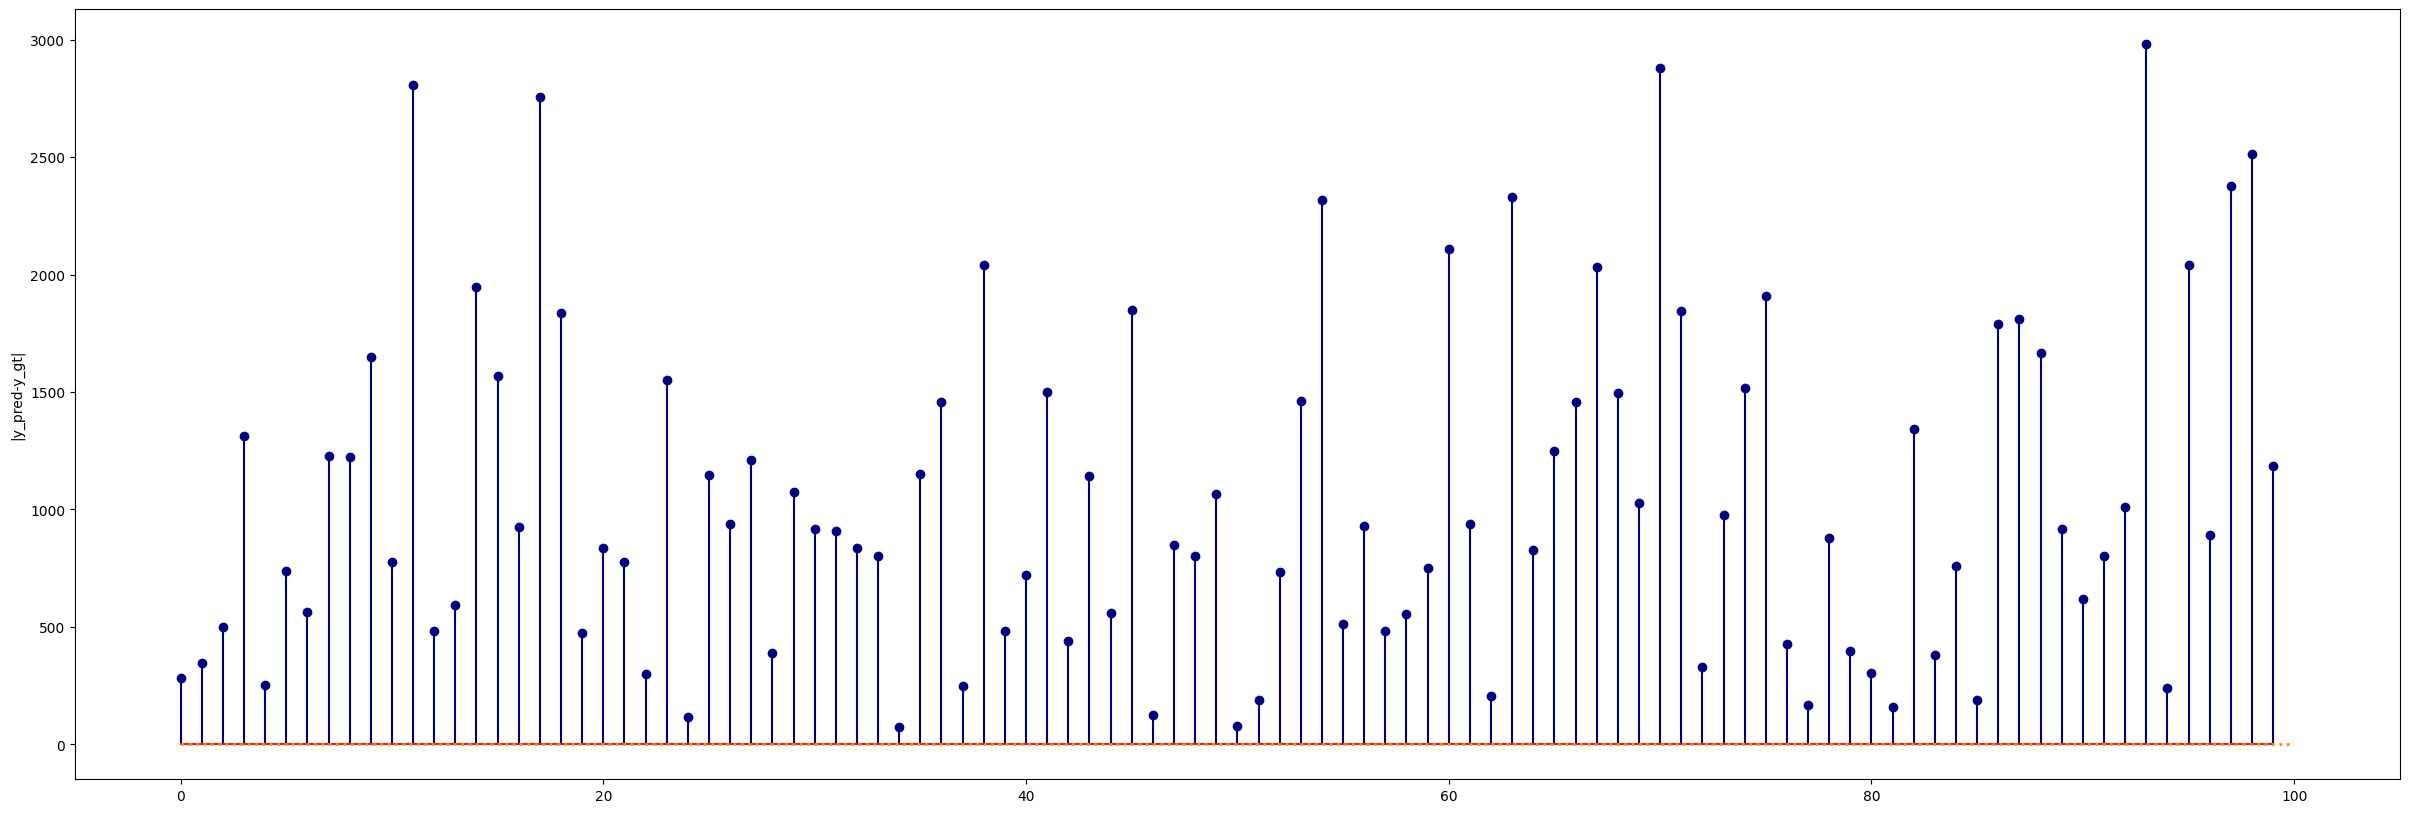

In [12]:
plot_mse(y_pred, y)